<a href="https://colab.research.google.com/github/sajid-munawar/Data_Cleaning_with_python/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Notebook: Data Cleaning with Python - Outliers


## 6. Outliers

#### <font color="blue">Pre-requisites</font>

In [1]:
# Pre-requisite 1
# ---
# Importing pandas library
# ---
# OUR CODE GOES BELOW
# 
import pandas as pd

In [2]:
# Pre-requisite 2
# ---
# Importing the seaborn library
# This is a visualisation library
# ---
# 
import seaborn as sns

#### <font color="blue">Examples</font>

##### <font color="blue">Example 1</font>

Text(0, 0.5, 'Life Expectancy')

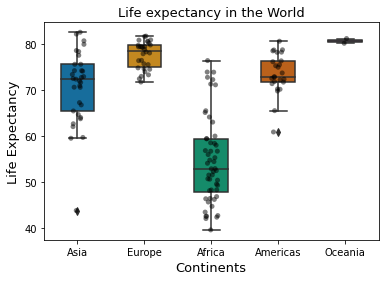

In [17]:
# Example 1
# --- 
# Finding outliers
# We can check for outliers with a box plot
# ---
# Dataset url = http://bit.ly/CountryDataset1
# ---
# OUR CODE GOES BELOW
#  

# Let's read data from url as dataframe
# 
outliers_df = pd.read_csv("http://bit.ly/CountryDataset1") 

# Lets preview our our dataframe below
#
outliers_df[outliers_df['year']==2007]

# Then we will work with only data for the year 2007
# Let's uncomment the line below 
# ---
# 
outliers_df_2007 = outliers_df[outliers_df['year']==2007] 
outliers_df_2007.head()

# We then specify from the multiple options to customize the boxplot with Seaborn.
# We then choose color palette scheme for the boxplot with Seaborn. 
# Here, we chose colorblind friendly palette “colorblind”. 
# Other color palette options available include deep, muted, bright, pastel, and dark.
# # The dots in the plot are outliers .
# Let's uncomment the line below 
# ---
#
bplot = sns.boxplot(y='lifeExp', x='continent', data = outliers_df_2007, width=0.5, palette="colorblind")

# Boxplot alone is extremely useful in getting the summary of data within and between groups. 
# However, often, it is a good practice to overlay the actual data points on the boxplot.
# We use jitter = True option to spread the data points horizontally and also 
# make boxplot with data points using stripplot.
# Let's uncomment the line below 
# ---
#
bplot = sns.stripplot(y='lifeExp', x='continent',  data = outliers_df_2007, jitter=True, marker='o', alpha=0.5, color='black')

# Naming and sizing our graph and axis
# Let's uncomment the 3 lines below 
# ---
#
bplot.axes.set_title("Life expectancy in the World", fontsize=13)
bplot.set_xlabel("Continents", fontsize=13)
bplot.set_ylabel("Life Expectancy", fontsize=13)

##### <font color="blue">Example 2</font>

In [25]:
outliers_df.shape

(1704, 6)

In [18]:
# Example 2
# ---
# Dealing with Outliers using the Interquantile range
# ---
# 
 
# There are many ways of dealing with the outliers however in this session we wiil 
# use the interquartile range (IQR). This is the first quartile subtracted from the third quartile, 
# i.e. the range covered by the middle 50% of the data; 
# The first and third quartile can be clearly seen on a box plot on the data above. 
# It is a measure of the dispersion similar to standard deviation or variance, 
# but is much more robust against outliers. Now, calculating IQR for each column.
# 

Q1 = outliers_df.quantile(0.25)
Q3 = outliers_df.quantile(0.75)
IQR = Q3 - Q1
IQR

# We now filter out outliers by keeping only valid values.
# Let's uncomment the lines below
# ---
#
outliers_df_iqr = outliers_df[~((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_df_iqr.shape

# Checking the size of the dataset with outliers for cleaning purposes
# ---
#
# outliers_df.shape

(1387, 6)

#### <font color="green">Challenges</font> 

##### <font color="green">Challenge 1</font>

In [38]:
# Challenge 1
# ---
# Question: Find the outliers in the given dataset.
# ---
# Dataset url = http://bit.ly/SampleDataset
# ---
# OUR CODE GOES BELOW
outliers_df=pd.read_csv('http://bit.ly/SampleDataset')
print(outliers_df.shape)
# bplot = sns.boxplot(data =df, width=0.5, palette="colorblind")
outliers_df


(8, 8)


,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
2,Cindy Jules,Stockholm,Sweden,48,117.0,NaN,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,NaN,4500.0,2300,6800


In [48]:
# defining quantile
Q1=outliers_df.quantile(0.25)
Q3=outliers_df.quantile(0.75)
IQR=Q3-Q1
IQR

HEIGHT             10.25
WEIGHT             29.50
ACCOUNT A         855.00
ACCOUNT B        7244.50
TOTAL ACCOUNT    7301.75
dtype: float64

In [49]:
# Determining how many outliers there are in our dataset
# ---
# 
outlier_df_iqr = outliers_df[((outliers_df < (Q1 - 1.5 * IQR)) |(outliers_df > (Q3 + 1.5 * IQR))).any(axis=1)]
outlier_df_iqr.shape


(3, 8)

In [50]:
# Displaying our outliers
# ---
# 
outlier_df[((outlier_df < (Q1 - 1.5 * IQR)) |(outlier_df > (Q3 + 1.5 * IQR))).any(axis=1)]


,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
0,Adi Dako,LISBON,PORTUGAL,56,132.0,2390.0,4340,6730
1,John Paul,LONDON,UNITED KINGDOM,62,165.0,4500.0,34334,38834
4,Freya Bismark,Berlin,GERMANYY,53,126.0,7000.0,19000,26000


##### <font color="green">Challenge 2</font>

In [29]:
# Challenge 2
# ---
# Question: Deal with the outliers in the given dataset.
# ---
# Dataset url = http://bit.ly/SampleDataset
# ---
# OUR CODE GOES BELOW
print(df.shape)



(8, 8)


(5,)

In [51]:
# Dropping the outliers
# ---
# 
clean_df = outlier_df[~((outlier_df < (Q1 - 1.5 * IQR)) |(outlier_df > (Q3 + 1.5 * IQR))).any(axis=1)]
clean_df.shape

(5, 8)

In [56]:
clean_df

,NAME,CITY,COUNTRY,HEIGHT,WEIGHT,ACCOUNT A,ACCOUNT B,TOTAL ACCOUNT
2,Cindy Jules,Stockholm,Sweden,48,117.0,NaN,5504,8949
3,Arthur Kegels,BRUSSELS,BELGIUM,59,121.0,4344.0,8999,300
5,Rena Filip,Brasilia,BRAZIL,50,167.0,4999.0,3999,3450
6,Cindy Jules,Stockholm,Sweden,48,117.0,3445.0,5504,8949
7,John Paul,LONDON,UNITED KINGDOM,62,NaN,4500.0,2300,6800


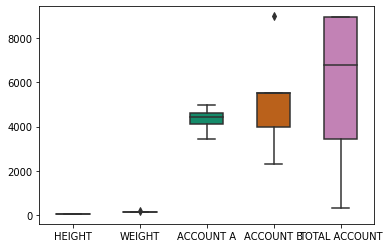

In [57]:
  sns.boxplot(data=clean_df,width=0.5,palette='colorblind')